## Heart Disease by Group 322

Shravya S Kadam - 2021SC04874@wilp.bits-pilani.ac.in, 
Thakkar Prachi Chetan Chetan - 2021SC04874@wilp.bits-pilani.ac.in, 
KANURU NAGESHWARA RAO - 2021SC04876@wilp.bits-pilani.ac.in

### Loading Dataset

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### Converting Categorical Attributes to Numeric

In [393]:
df['Sex'].replace(['M', 'F'],[0, 1], inplace=True)
df['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[0, 1, 2, 3], inplace=True)
df['RestingECG'].replace(['Normal', 'ST', 'LVH'],[0, 1, 2], inplace=True)
df['ExerciseAngina'].replace(['N', 'Y'],[0, 1], inplace=True)
df['ST_Slope'].replace(['Up', 'Flat', 'Down'],[0, 1, 2], inplace=True)
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0

### Shape of Dataframe

In [394]:
df.shape




(918, 12)

### Checking for Null Values

In [395]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Checking for Invalid Values

In [396]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Checking the Correlation Between the Attributes

<AxesSubplot:>

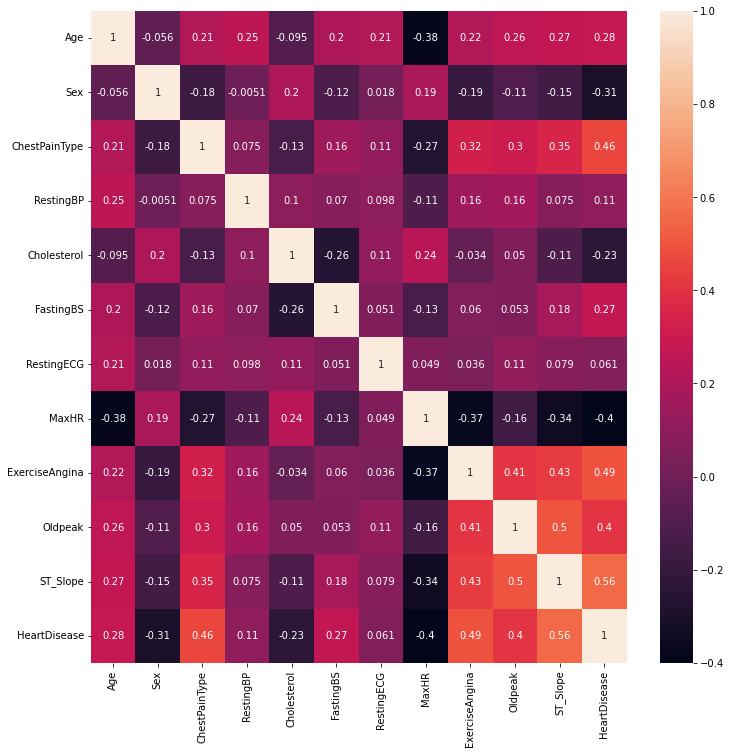

In [398]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, annot = True, ax = ax)


#if the correlation value "r" is higher between 2 variables we can ignore one
# range - between -1.0 and 1.0
#when "r"  is larger than 0.7 we can ignore any one variable between 2.

 As there is no such 2 attributes whose value is greater than 0.7. We conclude that we cannot eliminate any given attribute

### Checking the correlation between dependent attribute (HeartDisease) with independent attributes

In [399]:
print(df.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
ChestPainType     0.459017
Oldpeak           0.403951
MaxHR             0.400421
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.061011
Name: HeartDisease, dtype: float64


## Data Cleaning

#### Cleaning Age Column - Replacing the Invalid entry ie. Age less than '0' or greater than '100' with the mean value of the Age column

In [400]:
incorrectAgeList = []
total_count = df.shape[0]
total = 0
avgAge = 0
ismodified = 0

for i in range(df.shape[0]):
    if df.Age.iloc[i] <= 0 or df.Age.iloc[i] >= 100:
        incorrectAgeList.append(i)
    else:
        total = total + df.Age.iloc[i]

avgAge = total/total_count


for i in incorrectAgeList:
    df.loc[i,'Age'] = avgAge
    ismodified = 1
    
if ismodified == 1:
    df.to_csv("heart.csv", index=False,float_format='%g')



#### Cleaning RestingBP Column - We considered Standard RestingBP range as '60 - 180' and replaced the noise with mean of the column

In [401]:
incorrectBPList = []
total_count = df.shape[0]
total = 0
avgBP = 0
ismodified = 0

for i in range(df.shape[0]):
    if df["RestingBP"].iloc[i] <= 60 or df["RestingBP"].iloc[i] > 180:
        incorrectBPList.append(i)
    else:
        total = total + df.RestingBP.iloc[i]

avgBP = total/total_count

for i in incorrectBPList:
    df.loc[i,"RestingBP"] = avgBP
    ismodified = 1
    
if ismodified == 1:
    df.to_csv("heart.csv", index=False,float_format='%g')

#### Cleaning Cholesterol Column - We considered the Standard Cholesterol level range as '40 - 500' and replaced the noise with mean of the column

In [402]:
incorrectCholesterolList = []
total_count = df.shape[0]
total = 0
avgBP = 0
ismodified = 0

for i in range(df.shape[0]):
    if df["Cholesterol"].iloc[i] < 40 or df["Cholesterol"].iloc[i] > 500:
        incorrectCholesterolList.append(i)
    else:
        total = total + df.Cholesterol.iloc[i]

avgBP = total/total_count

for i in incorrectCholesterolList:
    df.loc[i,"Cholesterol"] = avgBP
    ismodified = 1
    
if ismodified == 1:
    df.to_csv("heart.csv", index=False,float_format='%g')

#### Cleaning MaxHR Column - We considered the Standard MaxHR level range as '200' and replaced the noise with mean of the column

In [403]:
incorrectMaxHRList = []
total_count = df.shape[0]
total = 0
avgOP = 0
ismodified = 0

for i in range(df.shape[0]):
    if df["MaxHR"].iloc[i] <= 0 or df["MaxHR"].iloc[i] > 200:
        incorrectMaxHRList.append(i)
    else:
        total = total + df.MaxHR.iloc[i]

avgOP = total/total_count

for i in incorrectMaxHRList:
    df.loc[i,"MaxHR"] = avgOP
    ismodified = 1
    
if ismodified == 1:
    df.to_csv("heart.csv", index=False,float_format='%g')

#### Cleaning Oldpeak Column - We considered the Standard Oldpeak level range as '-2.55 to 4.2 and replaced the noise with mean of the column

In [404]:
incorrectOldpeakList = []
total_count = df.shape[0]
total = 0
avgOP = 0
ismodified = 0

for i in range(df.shape[0]):
    if df["Oldpeak"].iloc[i] < -2.5 or df["Oldpeak"].iloc[i] > 4.2:
        incorrectOldpeakList.append(i)
    else:
        total = total + df.Oldpeak.iloc[i]

avgOP = total/total_count

for i in incorrectOldpeakList:
    df.loc[i,"Oldpeak"] = avgOP
    ismodified = 1
    
if ismodified == 1:
    df.to_csv("heart.csv", index=False,float_format='%g')

### Exploratory Data Analysis (EDA)

### Analysing HeartDisease variable

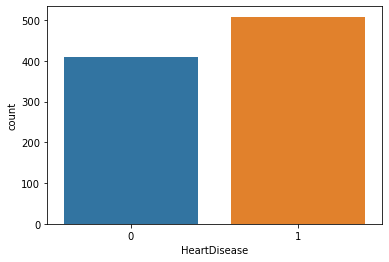

In [405]:
z = df["HeartDisease"]
sns.countplot(x=y)
target_temp = df.HeartDisease.value_counts()


From the plot we can conclude that in the given dataset has greater rate of heart disease 

### Analysing Sex variable wrt HeartDiease

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

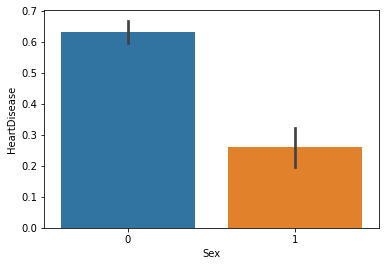

In [406]:
sns.barplot(x=df["Sex"],y=z)

#### From the plot we can conclude that "Male" (0) in the given dataset has greater heart disease than "Female" (1)

### Analysing ChestPainType variable wrt HeartDisease

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

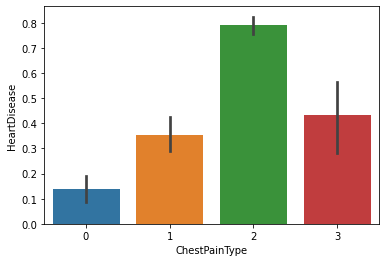

In [407]:
sns.barplot(x=df["ChestPainType"],y=z)

 From the plot we can conclude that patient with ChestPainType "ASY" (2) in the given dataset has greater heart disease than remaining ChestPainType

### Analysing RestingBP  variable wrt HeartDisease

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

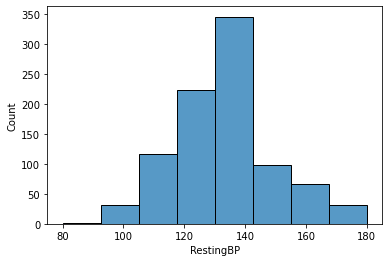

In [408]:
sns.histplot(x=df["RestingBP"],kde= False, bins = 8)

 From the plot we can conclude  in the given dataset there is higher distribution of people with BP level between 130-140 which is  higher and correlated to heart disease 

### Analysing FastingBS variable wrt HeartDisease

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

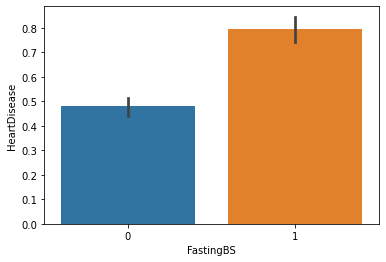

In [409]:
sns.barplot(x=df["FastingBS"],y=z)

 From the plot we can conclude that patient with FastingBS (1) in the given dataset has greater heart disease than without FastingBS. 

### Analysing RestingECG variable wrt HeartDisease

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

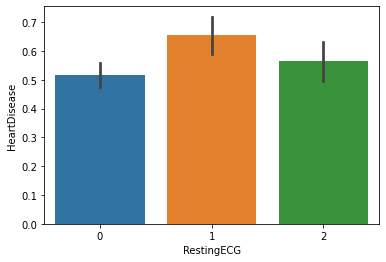

In [410]:
sns.barplot(x=df["RestingECG"],y=z)

From the plot we can conclude that patient with RestingECG "ST" (1) in the given dataset has greater heart disease than remaining RestingECG

### Analysing MaxHR variable wrt HeartDisease 

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

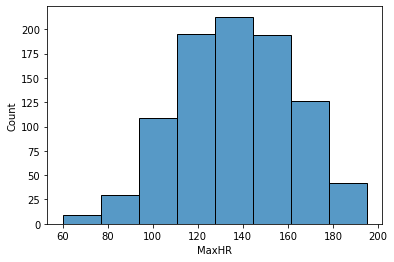

In [411]:
sns.histplot(x=df["MaxHR"],kde= False, bins = 8)

From the plot we can conclude in the given dataset there is higher distribution of people with MaxHR level between 110-130 which is higher and correlated to heart disease

### Analysing ExerciseAngina variable wrt HeartDisease

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

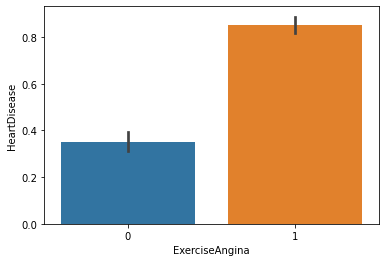

In [412]:
sns.barplot(x=df["ExerciseAngina"],y=z)

From the plot we can conclude that patient with ExerciseAngina  in the given dataset has greater heart disease than without ExerciseAngina

### Analysing Oldpeak variable wrt HeartDisease

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

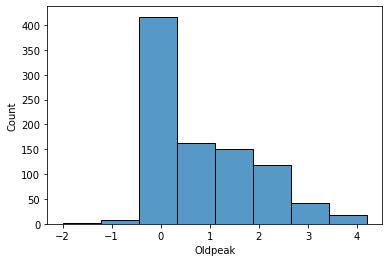

In [413]:
sns.histplot(x=df["Oldpeak"],kde= False, bins = 8)

From the plot we can conclude in the given dataset there is higher distribution of people with Oldpeak level between 0.7 to 1.1 which is lower and negatively correlate to heart disease

### Analysing ST_Slope variable wrt HeartDisease

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

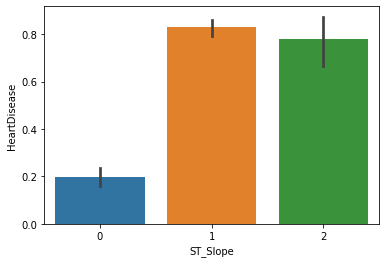

In [414]:
sns.barplot(x=df["ST_Slope"],y=z)

From the plot we can conclude that patient with ST_Slope "Flat" (1) in the given dataset has greater heart disease than remaining ST_Slope

### Train Test split

In [415]:
from sklearn.model_selection import train_test_split

predictors = df.drop("HeartDisease",axis=1)
target = df["HeartDisease"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [361]:
X_train.shape

(734, 11)

In [362]:
X_test.shape

(184, 11)

In [363]:
Y_train.shape

(734,)

In [364]:
Y_test.shape

(184,)

### Model Fitting

#### Logistic Regression

In [417]:
import sklearn.linear_model as lm


lr = lm.LogisticRegression()
lr.fit(X_train,Y_train)

Y_prediction_lr = lr.predict(X_test)
Y_prediction_lr.shape

C:\Users\Shravya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(184,)

 Finding Accuracy of Logistic Regression for the Model

In [418]:
accuracy_lr = round(accuracy_score(Y_prediction_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(accuracy_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.98 %


### Naive Bayes

In [419]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_prediction_nb = nb.predict(X_test)
Y_prediction_nb.shape

(184,)

Finding Accuracy of Naive Bayes for the Model

In [420]:
accuracy_nb = round(accuracy_score(Y_prediction_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(accuracy_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.52 %


### K Nearest Neighbors

In [421]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_prediction_knn=knn.predict(X_test)
Y_prediction_knn.shape

(184,)

Finding Accuracy of K Nearest Neighbors for the Model

In [422]:
accuracy_knn = round(accuracy_score(Y_prediction_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(accuracy_knn)+" %")

The accuracy score achieved using KNN is: 65.76 %


### Decision Tree

In [423]:
from sklearn.tree import DecisionTreeClassifier

maximum_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_prediction_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_prediction_dt,Y_test)*100,2)
    if(current_accuracy>maximum_accuracy):
        maximum_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_prediction_dt = dt.predict(X_test)
print(Y_prediction_dt.shape)

(184,)


Finding Accuracy of Decision Tree for the Model

In [424]:
accuracy_dt = round(accuracy_score(Y_prediction_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(accuracy_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.8 %


## From the accuracy we conclude that Naive Bayes is the best fit to our model